In [1]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import json
import shutil

from PIL import Image

/Users/carlschmidt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
datapath = '../data/'
valpath = datapath + 'val_pics/'
annotations = datapath + 'annotations/'


imgs = []

with open(annotations + 'filename_label.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        imgs.append(valpath + row[0])
        print(valpath + row[0])

imgs = imgs[1:]

../data/val_pics/file_name
../data/val_pics/ILSVRC2012_val_00000293.JPEG
../data/val_pics/ILSVRC2012_val_00002138.JPEG
../data/val_pics/ILSVRC2012_val_00003014.JPEG
../data/val_pics/ILSVRC2012_val_00006697.JPEG
../data/val_pics/ILSVRC2012_val_00007197.JPEG
../data/val_pics/ILSVRC2012_val_00009111.JPEG
../data/val_pics/ILSVRC2012_val_00009191.JPEG
../data/val_pics/ILSVRC2012_val_00009346.JPEG
../data/val_pics/ILSVRC2012_val_00009379.JPEG
../data/val_pics/ILSVRC2012_val_00009396.JPEG
../data/val_pics/ILSVRC2012_val_00010306.JPEG
../data/val_pics/ILSVRC2012_val_00011233.JPEG
../data/val_pics/ILSVRC2012_val_00011993.JPEG
../data/val_pics/ILSVRC2012_val_00012503.JPEG
../data/val_pics/ILSVRC2012_val_00013716.JPEG
../data/val_pics/ILSVRC2012_val_00016018.JPEG
../data/val_pics/ILSVRC2012_val_00017472.JPEG
../data/val_pics/ILSVRC2012_val_00017699.JPEG
../data/val_pics/ILSVRC2012_val_00017700.JPEG
../data/val_pics/ILSVRC2012_val_00017995.JPEG
../data/val_pics/ILSVRC2012_val_00018317.JPEG
../data

In [5]:
Timgs = imgs[:30]

print(len(Timgs))

30


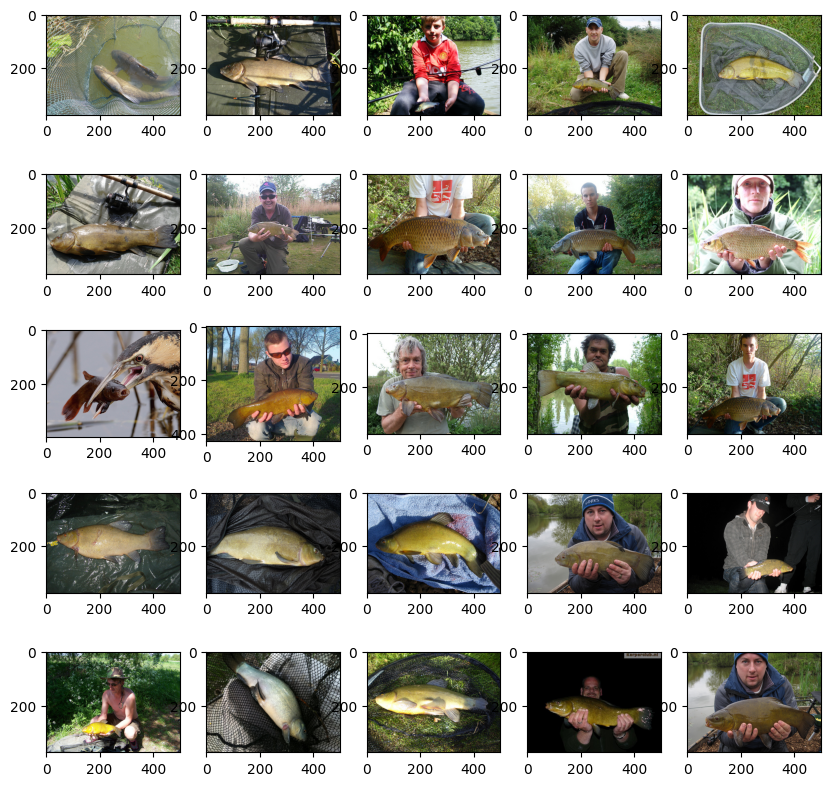

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    im = Image.open(Timgs[i])
    plt.imshow(im)

plt.show()

In [6]:
dfF = pd.read_csv(annotations + 'filename_label.csv')
dfL = pd.read_csv(annotations + 'imagenet_labels.txt', header=None)
LoL = dfL[1].to_numpy()
dfF['str_label'] = dfF['label'].apply(lambda x : LoL[x])
dfF

file_name  label      str_label
0      ILSVRC2012_val_00000293.JPEG      0          tench
1      ILSVRC2012_val_00002138.JPEG      0          tench
2      ILSVRC2012_val_00003014.JPEG      0          tench
3      ILSVRC2012_val_00006697.JPEG      0          tench
4      ILSVRC2012_val_00007197.JPEG      0          tench
...                             ...    ...            ...
49995  ILSVRC2012_val_00044368.JPEG    999  toilet tissue
49996  ILSVRC2012_val_00045266.JPEG    999  toilet tissue
49997  ILSVRC2012_val_00046353.JPEG    999  toilet tissue
49998  ILSVRC2012_val_00047144.JPEG    999  toilet tissue
49999  ILSVRC2012_val_00049174.JPEG    999  toilet tissue

[50000 rows x 3 columns]

In [86]:
dfF[dfF['str_label']=='musteline_mammal']

Empty DataFrame
Columns: [file_name, label, str_label]
Index: []

In [7]:
dfJson = pd.read_json(annotations+'imagenet_x_val_multi_factor.jsonl', lines=True)
dfJson

file_name  class  multiple_objects  background  \
0      ILSVRC2012_val_00004487.JPEG    762                 0           1   
1      ILSVRC2012_val_00003963.JPEG    292                 0           1   
2      ILSVRC2012_val_00041992.JPEG    718                 0           0   
3      ILSVRC2012_val_00028056.JPEG    635                 0           1   
4      ILSVRC2012_val_00016832.JPEG    497                 0           0   
...                             ...    ...               ...         ...   
48863  ILSVRC2012_val_00004973.JPEG    973                 0           1   
48864  ILSVRC2012_val_00038750.JPEG    765                 0           1   
48865  ILSVRC2012_val_00043497.JPEG    409                 0           1   
48866  ILSVRC2012_val_00005859.JPEG    441                 0           1   
48867  ILSVRC2012_val_00005939.JPEG    973                 0           0   

       color  brighter  darker  style  larger  smaller  object_blocking  \
0          0         0       0      0       1        0                0   
1          1         0       0      1       0        0                0   
2          1         0       0      0       0        0                0   
3          0         0       0      0       0        0                0   
4          1         0       1      0       0        0                0   
...      ...       ...     ...    ...     ...      ...              ...   
48863      1         0       0      0       0        0                0   
48864      0         0       0      1       0        0                0   
48865      1         0       0      0       0        0                0   
48866      0         0       0      0       0        0                0   
48867      0         0       0      0       0        0                0   

       person_blocking  partial_view  pattern  pose  shape  subcategory  \
0                    0             0        0     1      0            0   
1                    0             0        0     1      0            0   
2                    0             0        0     1      0            0   
3                    0             0        1     1      1            0   
4                    0             0        0     1      0            0   
...                ...           ...      ...   ...    ...          ...   
48863                0             0        0     1      0            0   
48864                0             0        0     1      0            0   
48865                0             0        0     1      0            0   
48866                0             0        1     1      0            0   
48867                0             0        1     1      1            1   

       texture                                      justification  \
0            0                 close up of a pan fried sea bass.    
1            0                               sepia image of tiger   
2            0                                the bridge is brown   
3            0   the magnetic compass is on the bronze container    
4            0                          A dark image of a church.   
...        ...                                                ...   
48863        0                                 color is different   
48864        0  front view image of rocking chair made by digi...   
48865        0  right angle of analog clock with gold metallic...   
48866        0                A different design of a beer glass.   
48867        0                        a different types of corals   

                 one_word  
0       sea bass close up  
1       digitally altered  
2               rare view  
3              wood shape  
4                    dark  
...                   ...  
48863               color  
48864  window digital art  
48865         right angle  
48866  pattern background  
48867              corals  

[48868 rows x 20 columns]

In [9]:
dfFinal = dfJson.merge(dfF, how='inner', on='file_name').drop(columns=['class'])

In [69]:
dfFinal.to_csv('val_imgs_df.csv', index=False)

In [72]:
df1 = pd.read_csv('val_imgs_df.csv')

In [73]:
df1

file_name  multiple_objects  background  color  \
0      ILSVRC2012_val_00004487.JPEG                 0           1      0   
1      ILSVRC2012_val_00003963.JPEG                 0           1      1   
2      ILSVRC2012_val_00041992.JPEG                 0           0      1   
3      ILSVRC2012_val_00028056.JPEG                 0           1      0   
4      ILSVRC2012_val_00016832.JPEG                 0           0      1   
...                             ...               ...         ...    ...   
48863  ILSVRC2012_val_00004973.JPEG                 0           1      1   
48864  ILSVRC2012_val_00038750.JPEG                 0           1      0   
48865  ILSVRC2012_val_00043497.JPEG                 0           1      1   
48866  ILSVRC2012_val_00005859.JPEG                 0           1      0   
48867  ILSVRC2012_val_00005939.JPEG                 0           0      0   

       brighter  darker  style  larger  smaller  object_blocking  ...  \
0             0       0      0       1        0                0  ...   
1             0       0      1       0        0                0  ...   
2             0       0      0       0        0                0  ...   
3             0       0      0       0        0                0  ...   
4             0       1      0       0        0                0  ...   
...         ...     ...    ...     ...      ...              ...  ...   
48863         0       0      0       0        0                0  ...   
48864         0       0      1       0        0                0  ...   
48865         0       0      0       0        0                0  ...   
48866         0       0      0       0        0                0  ...   
48867         0       0      0       0        0                0  ...   

       partial_view  pattern  pose  shape  subcategory  texture  \
0                 0        0     1      0            0        0   
1                 0        0     1      0            0        0   
2                 0        0     1      0            0        0   
3                 0        1     1      1            0        0   
4                 0        0     1      0            0        0   
...             ...      ...   ...    ...          ...      ...   
48863             0        0     1      0            0        0   
48864             0        0     1      0            0        0   
48865             0        0     1      0            0        0   
48866             0        1     1      0            0        0   
48867             0        1     1      1            1        0   

                                           justification            one_word  \
0                     close up of a pan fried sea bass.    sea bass close up   
1                                   sepia image of tiger   digitally altered   
2                                    the bridge is brown           rare view   
3       the magnetic compass is on the bronze container           wood shape   
4                              A dark image of a church.                dark   
...                                                  ...                 ...   
48863                                 color is different               color   
48864  front view image of rocking chair made by digi...  window digital art   
48865  right angle of analog clock with gold metallic...         right angle   
48866                A different design of a beer glass.  pattern background   
48867                        a different types of corals              corals   

      label         str_label  
0       762        restaurant  
1       292             tiger  
2       718              pier  
3       635  magnetic compass  
4       497            church  
...     ...               ...  
48863   973        coral reef  
48864   765     rocking chair  
48865   409      analog clock  
48866   441        beer glass  
48867   973        coral reef  

[48868 rows x 21 columns]

In [80]:
dfSample = df1.sample(30, random_state=42)

In [88]:
dfSample.to_csv('df_30img_samples.csv', index=False)
dfSample

file_name  multiple_objects  background  color  \
32258  ILSVRC2012_val_00049472.JPEG                 0           1      0   
41698  ILSVRC2012_val_00003768.JPEG                 0           0      0   
48172  ILSVRC2012_val_00041473.JPEG                 0           1      0   
13867  ILSVRC2012_val_00001470.JPEG                 0           1      0   
28143  ILSVRC2012_val_00049179.JPEG                 0           1      0   
41146  ILSVRC2012_val_00023283.JPEG                 0           1      0   
35018  ILSVRC2012_val_00030540.JPEG                 0           1      0   
36065  ILSVRC2012_val_00039246.JPEG                 0           1      0   
18821  ILSVRC2012_val_00015178.JPEG                 0           1      0   
30231  ILSVRC2012_val_00023750.JPEG                 0           1      0   
7258   ILSVRC2012_val_00007306.JPEG                 0           1      1   
48622  ILSVRC2012_val_00014415.JPEG                 0           1      1   
28319  ILSVRC2012_val_00026219.JPEG                 0           1      0   
15364  ILSVRC2012_val_00009634.JPEG                 0           1      0   
18163  ILSVRC2012_val_00036975.JPEG                 0           1      0   
17082  ILSVRC2012_val_00040913.JPEG                 0           1      1   
6936   ILSVRC2012_val_00015410.JPEG                 0           1      0   
34274  ILSVRC2012_val_00040676.JPEG                 0           1      1   
15273  ILSVRC2012_val_00040002.JPEG                 0           1      0   
19365  ILSVRC2012_val_00046002.JPEG                 0           1      1   
37442  ILSVRC2012_val_00041922.JPEG                 0           1      0   
29428  ILSVRC2012_val_00021882.JPEG                 0           1      1   
10151  ILSVRC2012_val_00030117.JPEG                 0           1      0   
42656  ILSVRC2012_val_00021683.JPEG                 0           1      0   
48236  ILSVRC2012_val_00030263.JPEG                 0           1      0   
42837  ILSVRC2012_val_00018867.JPEG                 0           1      1   
24120  ILSVRC2012_val_00003808.JPEG                 0           1      0   
879    ILSVRC2012_val_00010411.JPEG                 0           1      0   
39815  ILSVRC2012_val_00017515.JPEG                 0           1      1   
11396  ILSVRC2012_val_00025106.JPEG                 0           1      0   

       brighter  darker  style  larger  smaller  object_blocking  ...  \
32258         0       0      0       0        0                0  ...   
41698         0       0      0       0        0                0  ...   
48172         0       0      0       0        0                0  ...   
13867         0       0      0       0        0                0  ...   
28143         0       0      0       0        0                0  ...   
41146         0       0      0       0        0                0  ...   
35018         0       0      0       0        0                0  ...   
36065         0       1      0       0        1                0  ...   
18821         0       0      0       1        0                0  ...   
30231         0       0      0       0        0                0  ...   
7258          0       0      0       0        0                0  ...   
48622         0       0      0       0        0                0  ...   
28319         0       0      0       0        0                0  ...   
15364         0       0      0       0        0                0  ...   
18163         0       0      0       0        0                0  ...   
17082         0       0      0       0        0                0  ...   
6936          0       0      0       0        0                0  ...   
34274         0       0      0       0        0                0  ...   
15273         0       0      0       0        0                0  ...   
19365         0       0      0       0        0                0  ...   
37442         0       0      0       0        1                0  ...   
29428         0       0      0       0        0                

In [81]:
l = dfSample.file_name.to_numpy()

In [82]:
l

array(['ILSVRC2012_val_00049472.JPEG', 'ILSVRC2012_val_00003768.JPEG',
       'ILSVRC2012_val_00041473.JPEG', 'ILSVRC2012_val_00001470.JPEG',
       'ILSVRC2012_val_00049179.JPEG', 'ILSVRC2012_val_00023283.JPEG',
       'ILSVRC2012_val_00030540.JPEG', 'ILSVRC2012_val_00039246.JPEG',
       'ILSVRC2012_val_00015178.JPEG', 'ILSVRC2012_val_00023750.JPEG',
       'ILSVRC2012_val_00007306.JPEG', 'ILSVRC2012_val_00014415.JPEG',
       'ILSVRC2012_val_00026219.JPEG', 'ILSVRC2012_val_00009634.JPEG',
       'ILSVRC2012_val_00036975.JPEG', 'ILSVRC2012_val_00040913.JPEG',
       'ILSVRC2012_val_00015410.JPEG', 'ILSVRC2012_val_00040676.JPEG',
       'ILSVRC2012_val_00040002.JPEG', 'ILSVRC2012_val_00046002.JPEG',
       'ILSVRC2012_val_00041922.JPEG', 'ILSVRC2012_val_00021882.JPEG',
       'ILSVRC2012_val_00030117.JPEG', 'ILSVRC2012_val_00021683.JPEG',
       'ILSVRC2012_val_00030263.JPEG', 'ILSVRC2012_val_00018867.JPEG',
       'ILSVRC2012_val_00003808.JPEG', 'ILSVRC2012_val_00010411.JPEG',
      

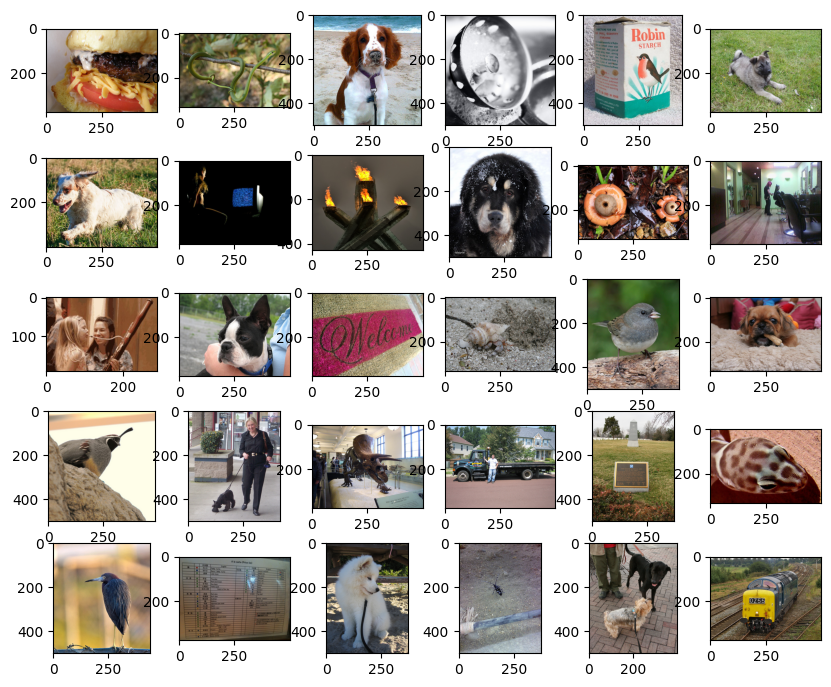

In [83]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    im = Image.open(valpath+l[i])
    plt.imshow(im)

plt.show()

In [111]:
protoDF = pd.read_csv(annotations+'prototypical_paths.csv')

protoDF = protoDF.merge(dfF, how='inner', on='file_name')

protoDF['proto_file_name'] = protoDF['file_name']

protoDF = protoDF.drop(columns=['file_name'])

In [112]:
protoDF

label      str_label               proto_file_name
0         0          tench  ILSVRC2012_val_00007197.JPEG
1         0          tench  ILSVRC2012_val_00026397.JPEG
2         0          tench  ILSVRC2012_val_00024327.JPEG
3         1       goldfish  ILSVRC2012_val_00000307.JPEG
4         1       goldfish  ILSVRC2012_val_00020785.JPEG
...     ...            ...                           ...
2995    998            ear  ILSVRC2012_val_00045809.JPEG
2996    998            ear  ILSVRC2012_val_00049555.JPEG
2997    999  toilet tissue  ILSVRC2012_val_00036056.JPEG
2998    999  toilet tissue  ILSVRC2012_val_00038905.JPEG
2999    999  toilet tissue  ILSVRC2012_val_00031618.JPEG

[3000 rows x 3 columns]

In [115]:
dfSample[['label', 'file_name']]

label                     file_name
32258    933  ILSVRC2012_val_00049472.JPEG
41698     55  ILSVRC2012_val_00003768.JPEG
48172    218  ILSVRC2012_val_00041473.JPEG
13867    828  ILSVRC2012_val_00001470.JPEG
28143    692  ILSVRC2012_val_00049179.JPEG
41146    174  ILSVRC2012_val_00023283.JPEG
35018    216  ILSVRC2012_val_00030540.JPEG
36065    851  ILSVRC2012_val_00039246.JPEG
18821    862  ILSVRC2012_val_00015178.JPEG
30231    244  ILSVRC2012_val_00023750.JPEG
7258     995  ILSVRC2012_val_00007306.JPEG
48622    423  ILSVRC2012_val_00014415.JPEG
28319    432  ILSVRC2012_val_00026219.JPEG
15364    195  ILSVRC2012_val_00009634.JPEG
18163    539  ILSVRC2012_val_00036975.JPEG
17082    125  ILSVRC2012_val_00040913.JPEG
6936      13  ILSVRC2012_val_00015410.JPEG
34274    154  ILSVRC2012_val_00040676.JPEG
15273     85  ILSVRC2012_val_00040002.JPEG
19365    196  ILSVRC2012_val_00046002.JPEG
37442     51  ILSVRC2012_val_00041922.JPEG
29428    864  ILSVRC2012_val_00021882.JPEG
10151    458  ILSVRC2012_val_00030117.JPEG
42656     38  ILSVRC2012_val_00021683.JPEG
48236    131  ILSVRC2012_val_00030263.JPEG
42837    922  ILSVRC2012_val_00018867.JPEG
24120    258  ILSVRC2012_val_00003808.JPEG
879      303  ILSVRC2012_val_00010411.JPEG
39815    201  ILSVRC2012_val_00017515.JPEG
11396    547  ILSVRC2012_val_00025106.JPEG

In [116]:
dfProtos = dfSample[['label', 'file_name']].merge(protoDF, how='inner', on = 'label')

In [118]:
dfProtos.to_csv('imgs_for_app.csv', index=False)

In [128]:
l_example = dfProtos.proto_file_name.to_numpy()

In [121]:
l_anno = dfSample.file_name.to_numpy()

In [125]:
for f in l_anno:
    shutil.copy(valpath+f, '../App/Images/anno_imgs/'+f)

In [ ]:
for f in l_example:
    shutil.copy(valpath+f, '../App/Images/example_imgs/'+f)

### Carls shit


In [29]:
dfJson['SUM'] = dfJson.iloc[:,2:18].sum(axis=1)

ILSVRC2012_val_00004976.JPEG


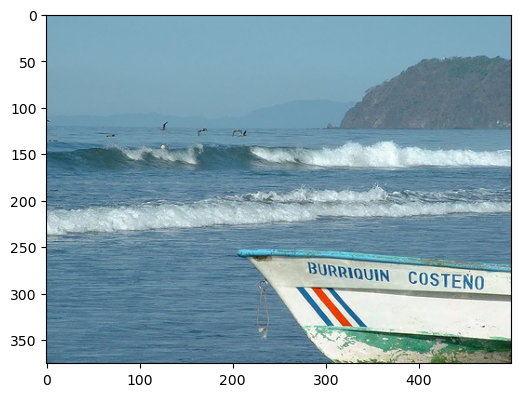

In [38]:
valpath = '../data/ILSVRC2012_img_val/'
instances = dfJson[(dfJson['multiple_objects'] == 1) & (dfJson['SUM'] == 1)].head()
image4intro = instances['file_name'].to_list()[0]
print(image4intro)
plt.figure(figsize=(6,6))
im = Image.open(valpath+image4intro)
plt.imshow(im)

plt.show()